In [220]:
#import libraries necessary for organizing and cleaning our data:
import numpy as np
import pandas as pd
import math
import re
import datetime
data = pd.read_csv('Kickstarter3.csv',encoding = "ISO-8859-1",index_col = False)
data.iloc[:,1:15]
n = len(data)
data

,name,category,subcategory,location,City,State,status,goal,pledged,funding_perc,backers,levels,reward levels,updates,comments,duration
0,Seeking funding for the completion of a Sculpture,Art,Sculpture,"Zirconia, NC",Zirconia,NC,failed,17000.0,25.0,0.001471,1,12,"5,16,31,51,101,251,351,501,1,001,2,501,3,501,5...",0,0,49.31
1,Zypic Apparel - Ready For The Next Step,Fashion,Fashion,"Zephyrhills, FL",Zephyrhills,FL,failed,5000.0,20.0,0.004000,1,5,"1,5,20,40,100",1,0,30.00
2,Abstract Photography Collection,Photography,Photography,"Zanesville, OH",Zanesville,OH,failed,500.0,0.0,0.000000,0,12,"5,10,15,25,45,55,65,75,100,125,200,500",1,0,20.00
3,My Life,Film & Video,Film & Video,"Zanesville, OH",Zanesville,OH,failed,10000.0,0.0,0.000000,0,4,"20,51,200,1,001",0,0,60.04
4,My First Gallery Exhibition - Black &amp; Whit...,Photography,Photography,"Zanesville, OH",Zanesville,OH,failed,10000.0,110.0,0.011000,2,15,"1,5,10,35,50,75,100,125,200,245,250,500,1,000,...",3,0,45.04
5,The Last March Of The Ents makes their debut EP,Music,Rock,"Yuma, AZ",Yuma,AZ,failed,250.0,0.0,0.000000,0,5,"5,15,25,50,100",0,0,60.00
6,A Grave Mistake,Film & Video,Short Film,"Yucca Valley, CA",Yucca Valley,CA,successful,1500.0,1625.0,1.083333,28,6,"5,25,50,100,500,1,000",0,0,20.00
7,Voodoo Organist's 7th album - Organeddon!,Music,Rock,"Yucca Valley, CA",Yucca Valley,CA,successful,1666.0,2450.0,1.470588,48,9,"1,10,25,50,100,125,150,250,666",8,5,30.00
8,I Am Sailboat's Debut EP and Tour!,Music,Music,"Yucca Valley, CA",Yucca Valley,CA,successful,1000.0,1116.0,1.116000,17,7,"1,5,20,50,100,500,3,000",2,2,33.53
9,Desert Rendezvous,Art,Performance Art,"Yucca Valley, CA",Yucca Valley,CA,live,8700.0,2065.0,0.237356,18,10,"5,10,25,50,75,100,250,500,750,1,000",3,2,45.00


In [26]:
#splitting location into city and state for analysis:
data['City'] = 'a'
data['State'] = 'b'
for i in range(n):
    data['City'] = data['location'][1].split()[0].replace(',','')
    data['State'] = data['location'][1].split()[1]

In [ ]:
#Defining project success as reaching 100% of funding goal:
    #calculating funding percentage:
data['funding_perc'] = 2.0
for i in range(n):
    data['funding_perc'][i] = data['pledged'][i] / data['goal'][i]

C:\Users\trist\Desktop\CondaFile\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'count')

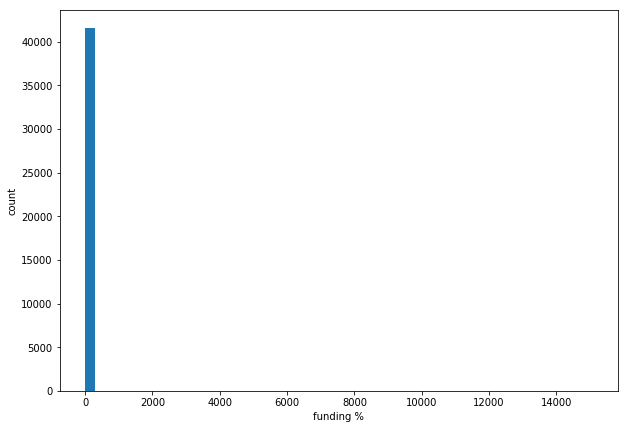

In [221]:
#examine distribution of funding percentage:
import seaborn as sns
from matplotlib import pyplot as plt
data['funding_perc'].plot.hist(bins=50)
plt.xlabel('funding %')
plt.ylabel('count')

Text(0,0.5,'Funding %')

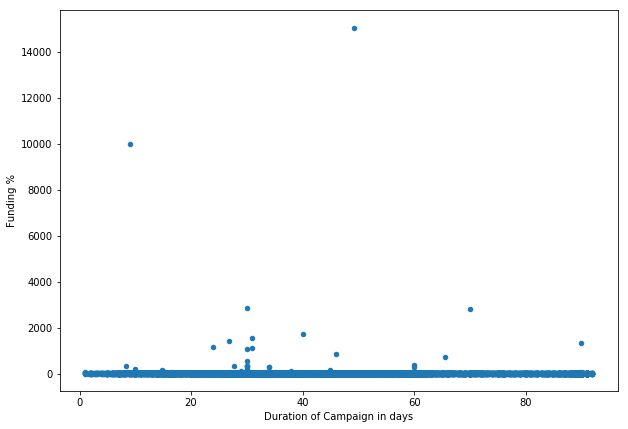

In [222]:
#Digging deeper to understand the distribution of success %s:
data.plot(kind='scatter',x='duration', y='funding_perc')
plt.xlabel('Duration of Campaign in days')
plt.ylabel('Funding %')

31178
41555


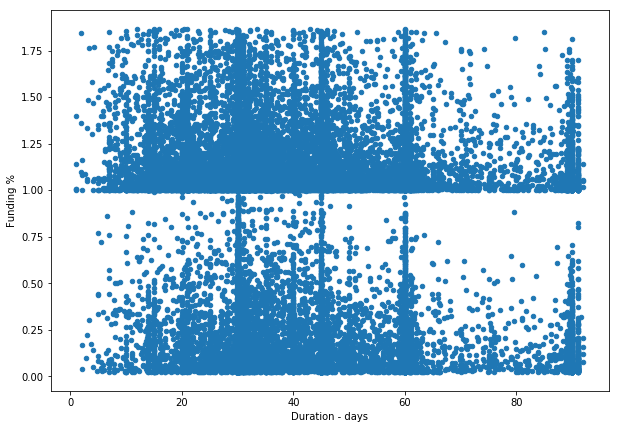

In [223]:
#restrict data to IQR range:
q1 = data['funding_perc'].quantile(.20)
q2 = data['funding_perc'].quantile(.95)
iqr = (data['funding_perc'] >= q1) & (data['funding_perc'] <= q2)
data1 = data.loc[iqr]

#check to see if IQR made a difference:
data1.plot(kind='scatter',x='duration', y='funding_perc')
plt.xlabel('Duration - days')
plt.ylabel('Funding %')
print(len(data1))
print(len(data))

C:\Users\trist\Desktop\CondaFile\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


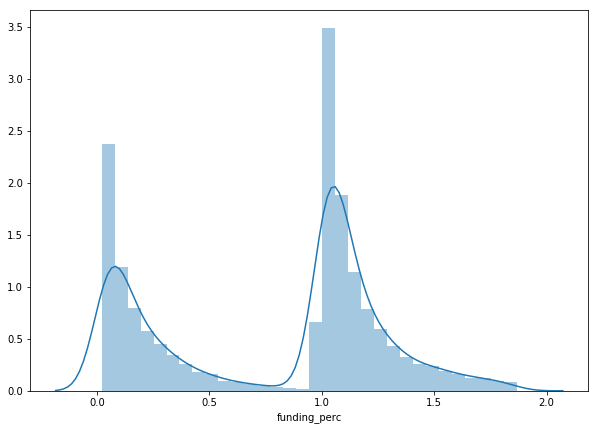

In [224]:
#investigate IQR change further
sns.distplot(data1['funding_perc'])

C:\Users\trist\Desktop\CondaFile\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


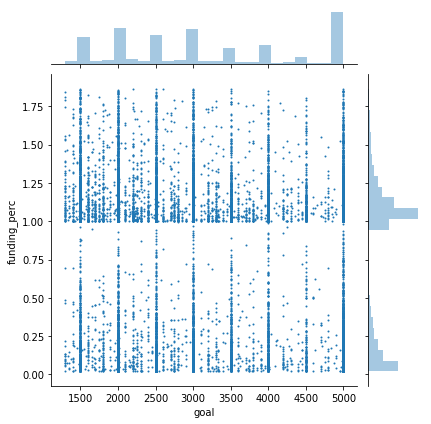

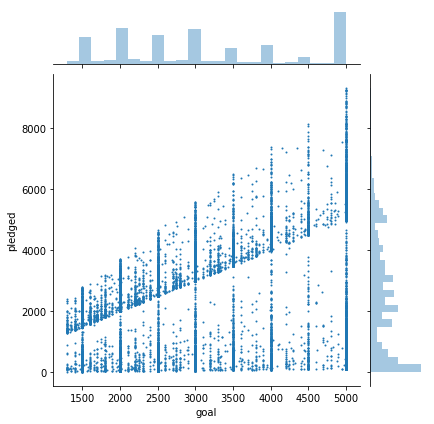

In [225]:
#Let's examine the ideal $goal for a succesful project
q1_ = data1['goal'].quantile(.20)
q2_ = data1['goal'].quantile(.60)
iqr = (data1['goal'] >= q1_) & (data['goal'] <= q2_)
data2 = data1.loc[iqr]
sns.jointplot(data2['goal'], data2['funding_perc'],s=1)
sns.jointplot(data2['goal'], data2['pledged'],s=1)

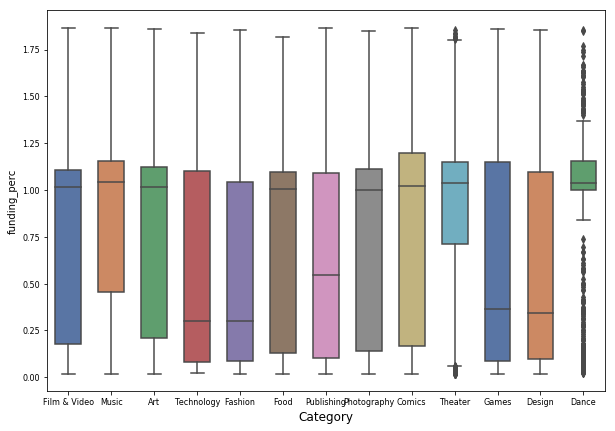

In [226]:
#Which category and subcategories are the most succesful:
a = sns.boxplot(x='category', y='funding_perc', data=data1, width=0.6,palette="deep")
a.set_xlabel("Category",fontsize=12)
a.tick_params(labelsize=8)
plt.rcParams['figure.figsize']=(10,7)

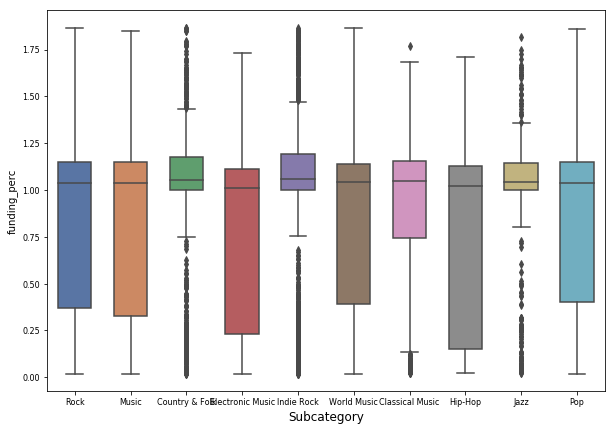

In [228]:
#Example of digging at subcategory level
specific = (data1['category'] == 'Music')
data4 = data1.loc[specific]
a = sns.boxplot(x='subcategory', y='funding_perc', data=data4, width=0.6,palette="deep")
a.set_xlabel("Subcategory",fontsize=12)
a.tick_params(labelsize=8)
plt.rcParams['figure.figsize']=(10,7)

C:\Users\trist\Desktop\CondaFile\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


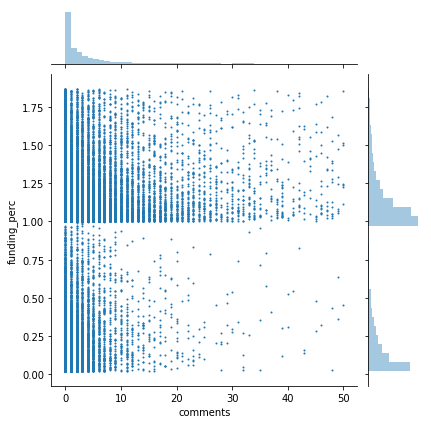

In [229]:
#Correlation with comments
q1_ = data1['comments'].quantile(0)
q2_ = data1['comments'].quantile(.99)
iqr = (data1['comments'] >= q1_) & (data['comments'] <= q2_)
data2 = data1.loc[iqr]
sns.jointplot("comments", "funding_perc", data=data2,s=1)

C:\Users\trist\Desktop\CondaFile\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


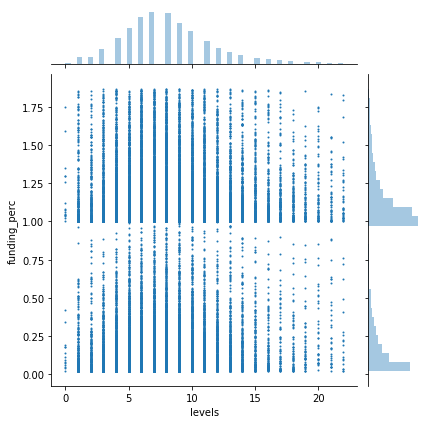

In [230]:
#Correlation with rewards levels
q1_ = data1['levels'].quantile(0)
q2_ = data1['levels'].quantile(.99)
iqr = (data1['levels'] >= q1_) & (data['levels'] <= q2_)
data2 = data1.loc[iqr]
sns.jointplot("levels", "funding_perc", data=data2,s=1)

C:\Users\trist\Desktop\CondaFile\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


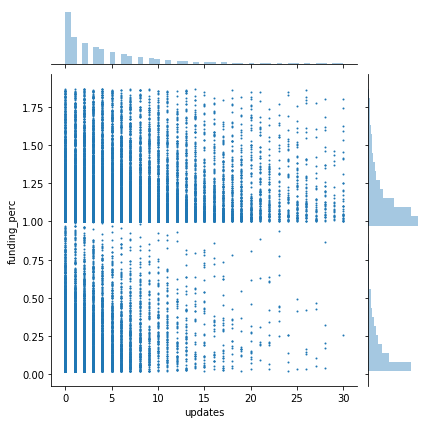

In [231]:
#Correlation with updates
q1_ = data1['updates'].quantile(0)
q2_ = data1['updates'].quantile(.99)
iqr = (data1['updates'] >= q1_) & (data['updates'] <= q2_)
data2 = data1.loc[iqr]
sns.jointplot("updates", "funding_perc", data=data2,s=1)

C:\Users\trist\Desktop\CondaFile\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


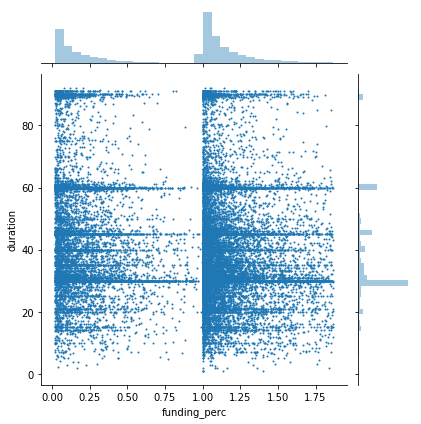

In [232]:
#how long should you have a campaign live for?
sns.jointplot(data1['funding_perc'], data1['duration'],s=1)

Text(0,0.5,'Funding %')

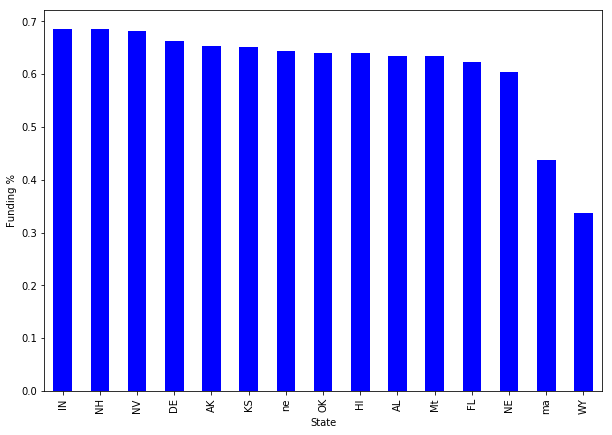

In [267]:
#top 10 states
data6 = data1.groupby('State')
data6['funding_perc'].mean().sort_values(ascending=False)[42:65].plot.bar(color='b')
plt.ylabel('Funding %')